In [647]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [648]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import hydro_serving_grpc as hs_grpc
from client import HydroServingClient, HydroServingServable, HydroServingModel

In [653]:
hs_client = HydroServingClient("localhost:9090")

In [654]:
requests.get("http://localhost:5000").text

'hydro_root_cause_service'

## RISE

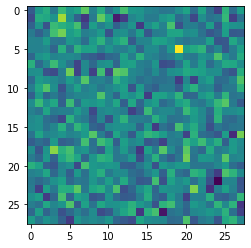

In [655]:
x = np.random.randn(28, 28)
plt.imshow(x)

In [656]:
r = requests.post("http://localhost:5000/rise", json={"model":{"name":"mnist", "version":1},
                                                      "explained_instance":x.tolist()})


In [658]:
redirect_url = r.headers['Location']
print(redirect_url)
requests.get(redirect_url).text

http://localhost:5000/status/rise/5606bf4f-7633-4e97-850d-0a2f4e62736f


'{\n  "progress": 0.98, \n  "state": "STARTED"\n}\n'

In [659]:
redirect_url = r.headers['Location']
print(redirect_url)
requests.get(redirect_url).text

http://localhost:5000/status/rise/5606bf4f-7633-4e97-850d-0a2f4e62736f


'{\n  "result": "http://localhost:5000/fetch_result/rise/5d288b549ce31bed2081e588", \n  "state": "SUCCESS"\n}\n'

In [690]:
import json
import ast

redirect_response = json.loads(requests.get(redirect_url).text)
results_response = json.loads(requests.get(redirect_response['result']).text)

masks = np.array(ast.literal_eval(results_response['result']['masks']))

Masks is an array of shape (number of classes, width, heigh). It can be seen as a collection of masks of shape (width, height), one for each class, which show which parts of images activate that particular class.

In [693]:
masks.shape 

(10, 28, 28)

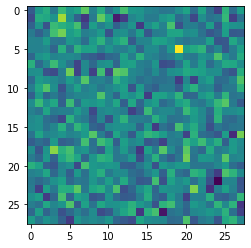

In [696]:
# Original image
plt.imshow(x)

## Anchor

niche ne rabotaet zhdu reqstore!